# Cardio Good Fitness Case Study - 

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.


## The team identifies the following customer variables to study:
1. product purchased, TM195, TM498, or TM798;<br>
2. gender;<br>
3. age, in years;<br>
4. education, in years;<br>
5. relationship status, single or partnered;<br>
6. annual household income ;<br>
7. average number of times the customer plans to use the treadmill each week;<br>
8. average number of miles the customer expects to walk/run each week;<br>
9. self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.<br>

## Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [1]:
#Loading the libraries
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("CardioGoodFitness.csv.txt")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


### Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [9]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


### A histogram shows the frequency on the vertical axis and the horizontal axis is for another dimension.

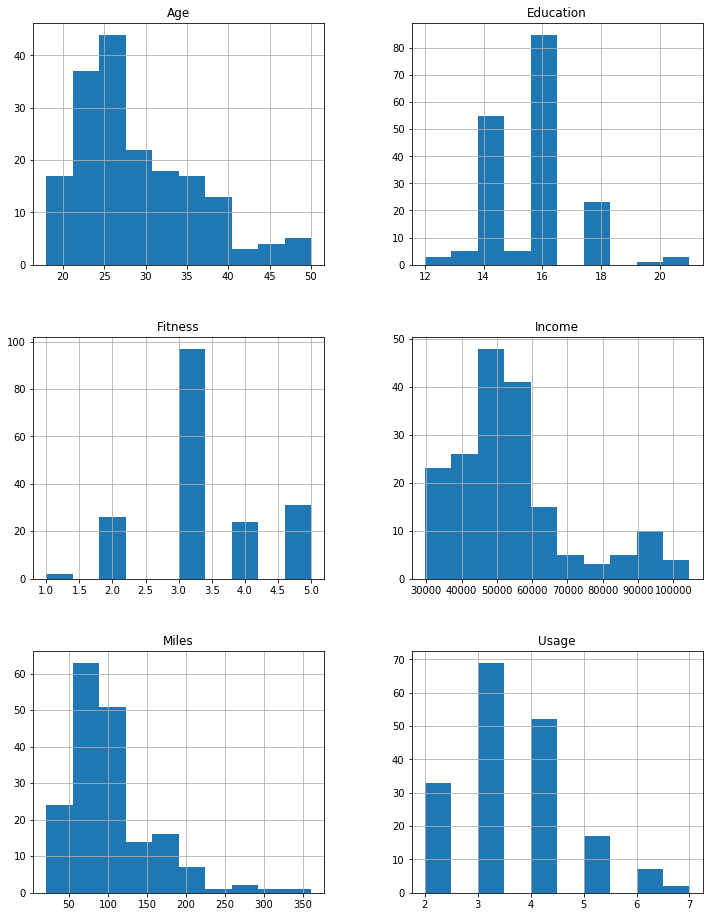

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(12,16))
plt.show()

### Boxplot

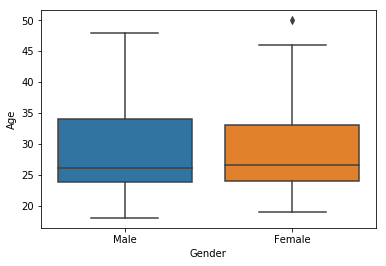

In [19]:
#Length of the whisker = 1.5 * Inter Quartile Range(IQR) 
#IQR = Q3-Q1
sns.boxplot(x="Gender", y="Age", data=df)
plt.show()

### Crosstab is used to plot the data for the categorical data

In [24]:
pd.crosstab(df['Product'],df['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


### Using the countplot we can convert the categorical data and plot it.

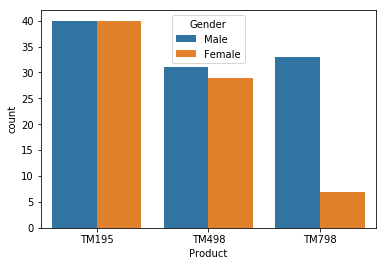

In [28]:
sns.countplot(x="Product", hue="Gender", data=df)
plt.show()

In [26]:
pd.crosstab(df['Product'],df['Income'] )

Income,29562,30699,31836,32973,34110,35247,36384,37521,38658,39795,...,85906,88396,89641,90886,92131,95508,95866,99601,103336,104581
Product,,,,,,,,,,,,,,,,,,,,,
TM195,1,1,1,3,2,5,3,2,3,2,...,0,0,0,0,0,0,0,0,0,0
TM498,0,0,1,2,3,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
TM798,0,0,0,0,0,0,0,0,0,0,...,1,2,2,3,3,1,1,1,1,2


### The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

In [32]:
pd.pivot_table(df, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

#### By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column

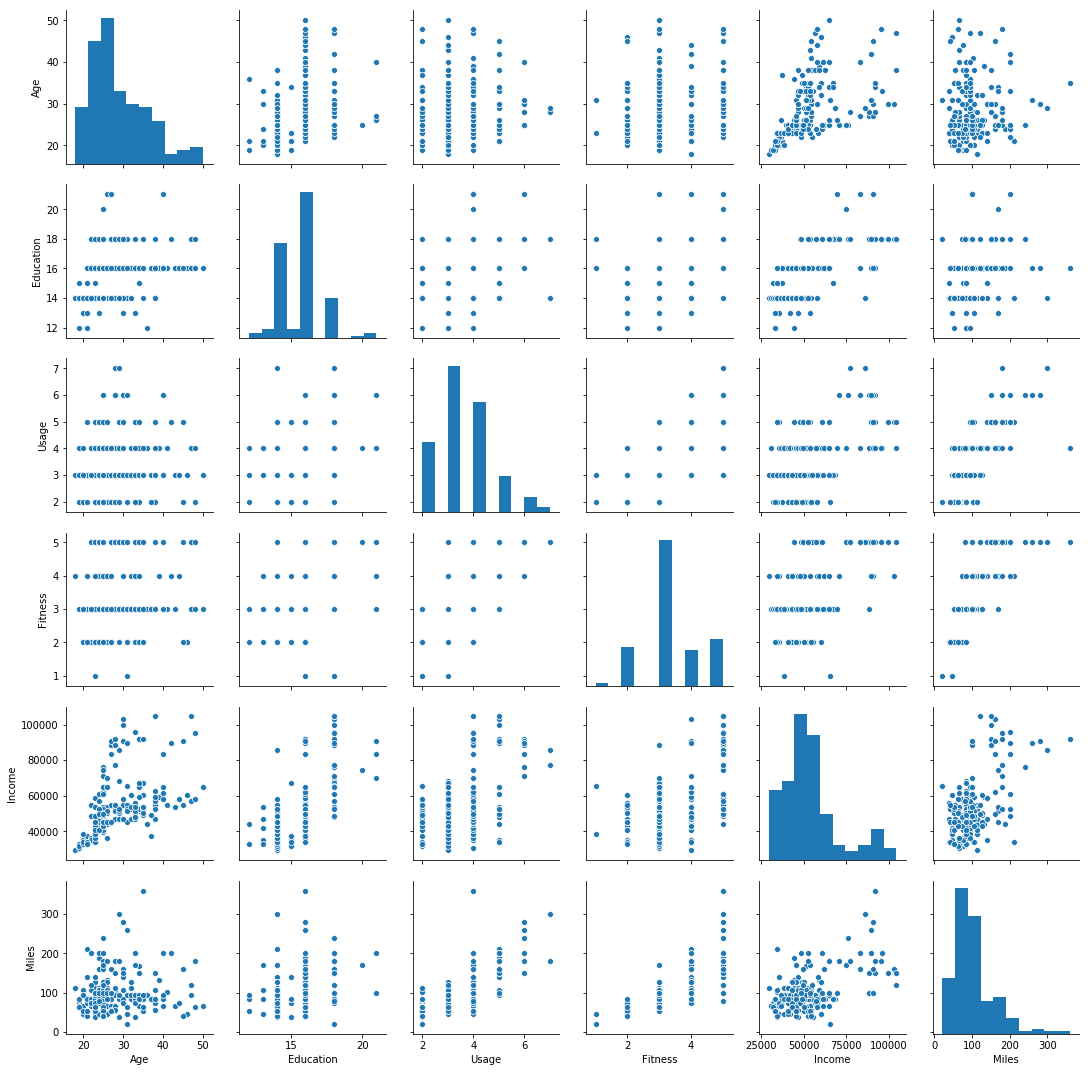

In [34]:
sns.pairplot(df)
plt.show()

### Correlation between the parameters 

In [35]:
corr = df.corr(method='pearson')
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


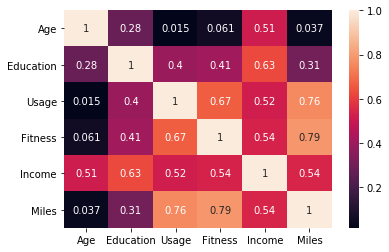

In [37]:
sns.heatmap(corr, annot=True)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier



In [6]:
X=df[['Usage','Fitness']]
y=df[['Miles']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Linear Regression

In [38]:
lr = LinearRegression()
lr.fit(X_test,y_test)
lr.score(X_test,y_test)

0.7670482252399948

#  Logistic Regression

In [42]:
lg = LogisticRegression(solver='liblinear',multi_class='ovr')
lg.fit(X_test,y_test.values.ravel())
lg.score(X_test,y_test)

0.24074074074074073

# SVM

In [43]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train.values.ravel())
svm.score(X_test, y_test)

0.2037037037037037

# Decision Tree

In [45]:
model = tree.DecisionTreeClassifier()
model.fit(X_test, y_test)
model.score(X_test,y_test)

0.42592592592592593

# Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train.values.ravel())
rf.score(X_test, y_test)

0.2037037037037037

# **Linear Regression** works better on this Dataset